<a href="https://colab.research.google.com/github/TSkinne4/MAT-421/blob/main/Module_H2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical Error and Stability

One of the issues that we may face is that there is compounding error in our methods, which causes the difference between the analytical and numeric solutions to grow over time. This is often dependant on our choice of step size. In the following, we compare explicit Euler, implicit Euler, and the trapazoidal rule for the dampened harmonic oscillator. 


h=0.10101010101010101


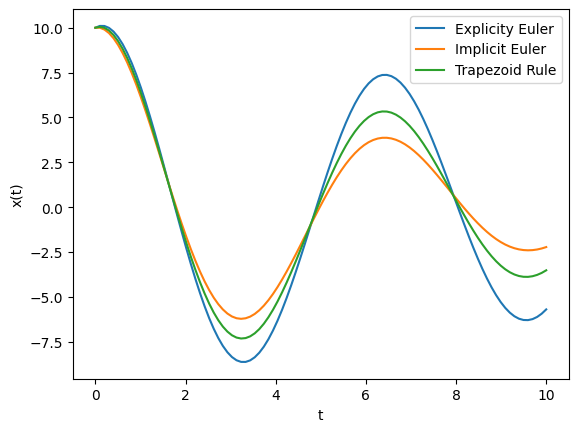

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
t_final = 10
h = t_final/(N-1)
print(f'h={h}')


b = 0.1
km = 1

t_list = np.linspace(0,t_final,N)
x_ee = np.zeros_like(t_list)

S = np.array([10.0,1.0])
n = 0
while n < N:
  x_ee[n] = S[0]
  New_S = S[:]
  New_S[0] = S[0] + h*S[1]
  New_S[1] = S[1] + h*(-km*S[0]-b*S[1])
  S[:] = New_S[:] 
  n += 1

x_ie = np.zeros_like(t_list)
S = np.array([10.0,1.0])
n = 0
A = (1+h*b)+h**2*km
while n < N:
  x_ie[n] = S[0]
  New_S = S[:]
  New_S[0] = 1/A*((1+h*b)*S[0]+h*S[1])
  New_S[1] =  1/A*(-h*km*S[0]+S[1])
  S[:] = New_S[:] 
  n += 1

x_t = np.zeros_like(t_list)
S = np.array([10.0,1.0])
n = 0
A = (1+h*b/2)+(h/2)**2*km
while n < N:
  x_t[n] = S[0]
  New_S = S[:]
  New_S[0] = h/(2*A)*((2/h+b-h/2*km)*S[0]+2*S[1])
  New_S[1] =  h/(2*A)*(-2*km*S[0]+(2/h-b-h/2*km)*S[1])
  S[:] = New_S[:] 
  n += 1

plt.plot(t_list,x_ee,label = 'Explicity Euler')
plt.plot(t_list,x_ie,label = 'Implicit Euler')
plt.plot(t_list,x_t,label = 'Trapezoid Rule')
plt.ylabel('x(t)')
plt.xlabel('t')
plt.legend()


#Predictor-corrector and Runge Kutta Methods

predictor corrector methods work by finding the value at numerous points in time, sometimes at points that are outisde of our grid. This includes the midpoint method, which first dinds the value at half of a time step and then uses this value fto go the whole time step. We can see this using our harmonic oscillator:

Text(0.5, 0, 't')

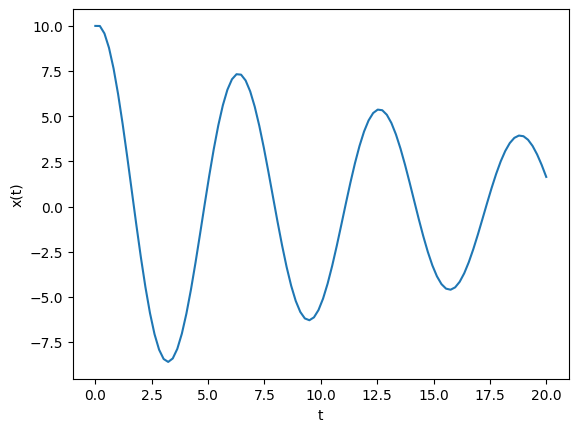

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
t_final = 20
h = t_final/(N-1)


b = 0.1
km = 1

t_list = np.linspace(0,t_final,N)
x_list = np.zeros_like(t_list)

S = np.array([10.0,1.0])
pred = np.zeros_like(S)
n = 0
while n < N:
  x_list[n] = S[0]
  New_S = S[:]
  
  pred[0] = S[0] + h/2*S[1]
  pred[1] = S[1] + h/2*(-km*S[0]-b*S[1])

  New_S[0] = S[0] + h*pred[1]
  New_S[1] = S[1] + h*(-km*pred[0]-b*pred[1])
  S[:] = New_S[:] 
  n += 1
plt.plot(t_list,x_list)
plt.ylabel('x(t)')
plt.xlabel('t')



Another method are Runge-Kutta methods. These work by predicting more terms in the taylor expansion. In particular, we will observe RK4, which defines
$$
  \begin{align*}
    k_1 &= F(t_j,S(t_j))\\
    k_2 &= F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h\right)\\
    k_3 &= F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h\right)\\
    k_4 &= F(t_j+h,S(t_k)+k_3h)
  \end{align*}
$$
This we thus get that
  $$S(t_{j+1})=S(t_j) =\frac{h}{6}\left(k_1+2k_2+2k_3+k_4\right).$$
  In code we see that



Text(0.5, 0, 't')

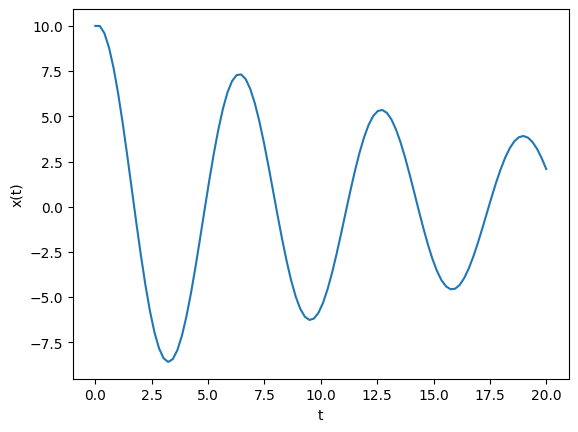

In [18]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
t_final = 20
h = t_final/(N-1)


b = 0.1
km = 1

t_list = np.linspace(0,t_final,N)
x_list = np.zeros_like(t_list)

S = np.array([10.0,1.0])
A = np.array([[0,1],[-km,-b]])
n = 0

while n < N:
  x_list[n] = S[0]
  New_S = S[:]
  k1 = np.dot(A,S)
  k2 = np.dot(A,S+h/2*k1)
  k3 = np.dot(A,S+h/2*k2)
  k4 = np.dot(A,S+h*k3)


  New_S = S+h/6*(k1+2*k2+2*k3+k4)
  S[:] = New_S[:] 
  n += 1
plt.plot(t_list,x_list)
plt.ylabel('x(t)')
plt.xlabel('t')

#Python ODE Solvers

As we may expect, Python has built-in ODE solvers which we can utilize. This is displayed in the following code

Text(0.5, 0, 't')

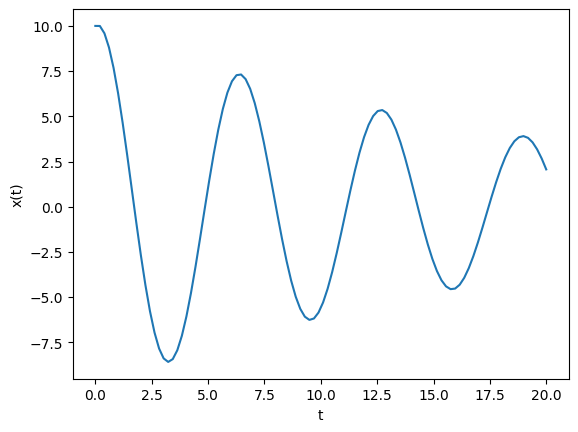

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
N = 100
t_final = 20
h = t_final/(N-1)


b = 0.1
km = 1

t_list = np.linspace(0,t_final,N)
x_list = np.zeros_like(t_list)

S0 = np.array([10.0,1.0])
F = lambda t,S: np.dot(A,S)
sol = solve_ivp(F,[0,t_final],S0,t_eval=t_list)

plt.plot(sol.t,sol.y[0])
plt.ylabel('x(t)')
plt.xlabel('t')